## Import Libraries

In [58]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# plt.style.use('fivethirtyeight')
# sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.decomposition import PCA

## Loading data

In [59]:
df_offer = pd.read_csv('/Users/artashesmatshkalyan/Python Projects/Starbucks Data Analysis/portfolio.csv')
df_offer.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [60]:
df_customer = pd.read_csv('/Users/artashesmatshkalyan/Python Projects/Starbucks Data Analysis/profile.csv')
df_customer.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [61]:
df_transcript = pd.read_csv('/Users/artashesmatshkalyan/Python Projects/Starbucks Data Analysis/transcript.csv')
df_transcript.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


# 1. Data Wrangling

## 1.1 Data Cleaning Part

In [62]:
# Drop the unnecessary column(s)
# Column 'Unnamed: 0' is not useful hence to be dropped.
df_offer = df_offer.drop('Unnamed: 0', axis = 1)
df_customer = df_customer.drop('Unnamed: 0', axis = 1)
df_transcript = df_transcript.drop('Unnamed: 0', axis = 1)

### Check for missing values

In [63]:
df_offer.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [64]:
df_customer.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [65]:
df_transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [66]:
missing_gender = df_customer[df_customer['gender'].isna()]
missing_income = df_customer[df_customer['income'].isna()]

np.sum(missing_gender['id'] == missing_income['id'])

2175

In [67]:
# Remove rows with missing values in `df_customer`
id_to_remove = missing_income['id']
df_customer_no_na = df_customer[~df_customer['id'].isin(id_to_remove)]
df_customer_no_na = df_customer_no_na.reset_index(drop = True)
df_customer_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB


### Check data types of 3 tables


In [68]:
df_offer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [69]:
channels_0 = df_offer['channels'][0]
offer_type_0 = df_offer['offer_type'][0]
id_0 = df_offer['id'][0]

print('First value in column channels:', channels_0, '  --   Data type:', type(channels_0))
print('First value in column offer_type:', offer_type_0, '  --   Data type:', type(offer_type_0))
print('First value in column id:', id_0, '  --   Data type:', type(id_0))

First value in column channels: ['email', 'mobile', 'social']   --   Data type: <class 'str'>
First value in column offer_type: bogo   --   Data type: <class 'str'>
First value in column id: ae264e3637204a6fb9bb56bc8210ddfd   --   Data type: <class 'str'>


In [70]:
df_customer_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB


In [71]:
df_customer_no_na['became_member_on'] = pd.to_datetime(df_customer_no_na['became_member_on'], format = '%Y%m%d')

In [72]:
df_customer_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 579.2+ KB


In [73]:
df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [74]:
# Rename column `time`
df_transcript.rename(columns = {'time' : 'hours_since_start'}, inplace = True)
df_transcript.head(1)

,person,event,value,hours_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0


In [75]:
# Check data type of column `value`
type(df_transcript['value'][0])

str

## 1.2 Data Transformation Part


In [76]:
#Transform df_offer
#Add an alias to each offer for easier recognition and referencing.
# Sort df offers
df_offer = df_offer.sort_values(['offer_type', 'difficulty']).reset_index(drop = True)

# Add column `offer_alias`
from string import ascii_uppercase
df_offer['offer_alias'] = [ascii_uppercase[i] for i in range(df_offer.shape[0])]
df_offer


,reward,channels,difficulty,duration,offer_type,id,offer_alias
0,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,A
1,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,B
2,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,C
3,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,D
4,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,E
5,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,F
6,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,G
7,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,H
8,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,I
9,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,J


In [77]:
# Transform `df_transcript`
# Elements of column `value` are dictionaries as strings. Need to be separated the keys and the values and place them into two columns for easier manipulation.

In [78]:
# Elements in value_columns are strings. Convert them to dictionaries
value_column = df_transcript['value']
value_column = value_column.apply(eval)
value_column[:3]

0    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
Name: value, dtype: object

In [79]:
# Extract the keys
dictionary_key_column = [list(d.keys())[0] for d in value_column]
# Extract the values
dictionary_value_column = [list(d.values())[0] for d in value_column]
# Create a df containing the keys and values of the dictionary elements of `value_column`
value_column_split = pd.DataFrame(columns = ['dict_key', 'dict_value'])
value_column_split['dict_key'] = dictionary_key_column
value_column_split['dict_value'] = dictionary_value_column
value_column_split.head(3)

,dict_key,dict_value
0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer id,2906b810c7d4411798c6938adc9daaa5


In [80]:
# Replace `value` column with df `value_column_split`
df_transcript_value_mod = df_transcript.drop('value', axis = 1)
df_transcript_value_mod = pd.concat([df_transcript_value_mod, value_column_split], axis = 1)

In [81]:
# Reorder columns
df_transcript_value_mod.columns.values

array(['person', 'event', 'hours_since_start', 'dict_key', 'dict_value'],
      dtype=object)

In [82]:
col_names = ['person', 'event', 'dict_key', 'dict_value', 'hours_since_start']
df_transcript_value_mod = df_transcript_value_mod[col_names]
df_transcript_value_mod.sample(3)

,person,event,dict_key,dict_value,hours_since_start
25571,c99f2747263b49b695a55e324d1a2c9a,offer completed,offer_id,fafdcd668e3743c1bb461111dcafc2a4,30
218780,a5d1040cc7f94b0cabc4965f9fd7a8ff,transaction,amount,1.93,510
69605,bdd4deefab304ad19f154b6c35b9254d,offer viewed,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0,174


In [83]:
offers = df_offer.copy()
customers = df_customer_no_na.copy()
transcripts = df_transcript_value_mod.copy()

# 2. Exploratory Data Analysis

### Univariate Analysis - gender

In [84]:
import plotly.express as px

# Sample data
wedge_size = df_customer_no_na['gender'].value_counts()
wedge_label = ['Male', 'Female', 'Other']

# Define colors
colors = ['#488a99', '#763f89', '#cf2525']  # You can customize these colors

# Create a Pie chart using Plotly Express
fig = px.pie(values=wedge_size, names=wedge_label, 
             color_discrete_sequence=colors, 
             title='Gender Distribution',
             hole=0.4,  # Specify the size of the center hole (0 to 1)
             labels={'label': 'Gender', 'value': 'Count'},  # Customize labels
             template='plotly_dark',  # Choose a template (e.g., 'plotly', 'plotly_dark', 'plotly_white')
             )

# Additional customization options
fig.update_traces(textinfo='percent+label', pull=[0.1, 0, 0.1], marker=dict(line=dict(color='black', width=2)))

# Change the background color
fig.update_layout(
    plot_bgcolor='#4b4b4b',  # Set the background color of the plot area
    paper_bgcolor='#4b4b4b'  # Set the background color of the entire figure
)

# Display the pie chart
fig.show()


### Univariate Analysis - age

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64


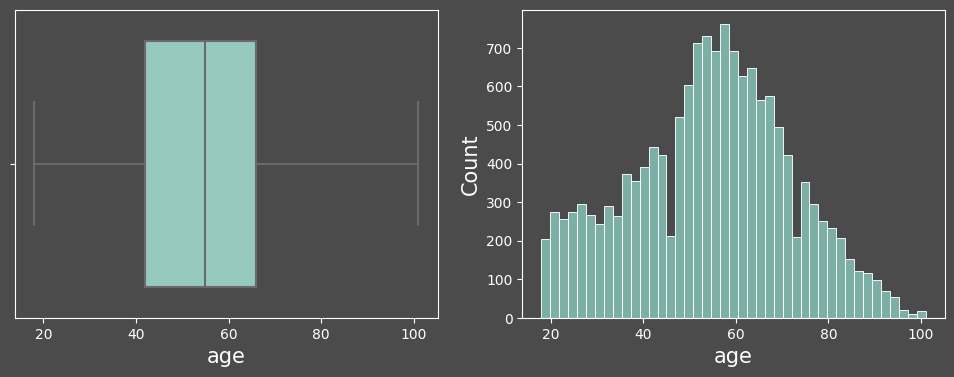

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the background color
background_color = '#4b4b4b'
fig, axs = plt.subplots(1, 2, figsize=(12, 4), facecolor=background_color)

# Create the boxplot and histogram
sns.boxplot(data=customers, x='age', ax=axs[0])
sns.histplot(data=customers, x='age', ax=axs[1])

# Set label sizes
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)

# Set the background color for each subplot
for ax in axs:
    ax.set_facecolor(background_color)

# Display descriptive statistics
print(customers['age'].describe())

# Show the plot
plt.show()


#### Divide customers into age groups 

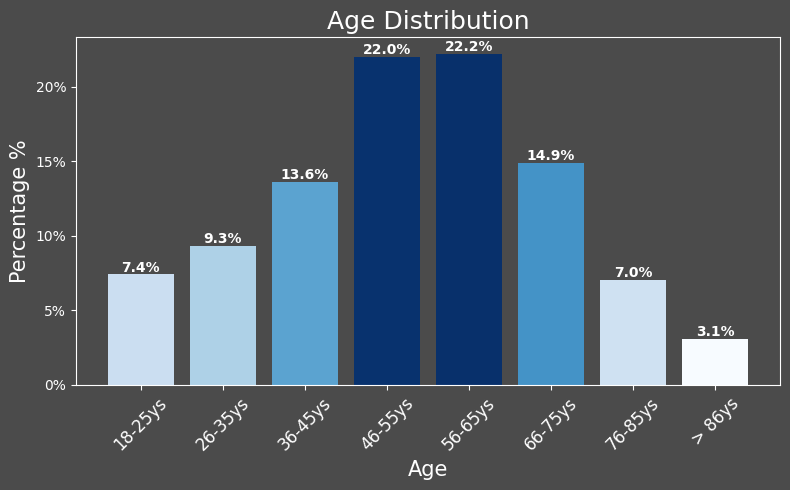

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Assuming customers DataFrame and age_group column are already defined

# Create a new column `age_group`
age_group = pd.cut(customers['age'],
                   bins=[customers['age'].min(), 26, 36, 46, 56, 66, 76, 86, customers['age'].max()],
                   labels=['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys'])
customers['age_group'] = age_group

# Visualize customers by age groups
age_group_percentage = (customers.value_counts('age_group').sort_index() / customers.shape[0] * 100).round(1)

# Set the background color
background_color = '#4b4b4b'

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

yticks = np.arange(0, 25, 5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels=yticklabels)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Percentage %', fontsize=15)
plt.title('Age Distribution', fontsize=18)

# Set the color of the bars using a diverging color map (light blue to dark blue)
norm = Normalize(vmin=age_group_percentage.min(), vmax=age_group_percentage.max())
colors = plt.cm.Blues(norm(age_group_percentage))

bar_plot = plt.bar(x=age_group_percentage.index.values, height=age_group_percentage, color=colors)

for i, bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x + bar.get_width() / 2, y + bar.get_height() + 0.2,
             str(age_group_percentage[i]) + '%',
             ha='center', weight='bold')

plt.tight_layout()
plt.show()


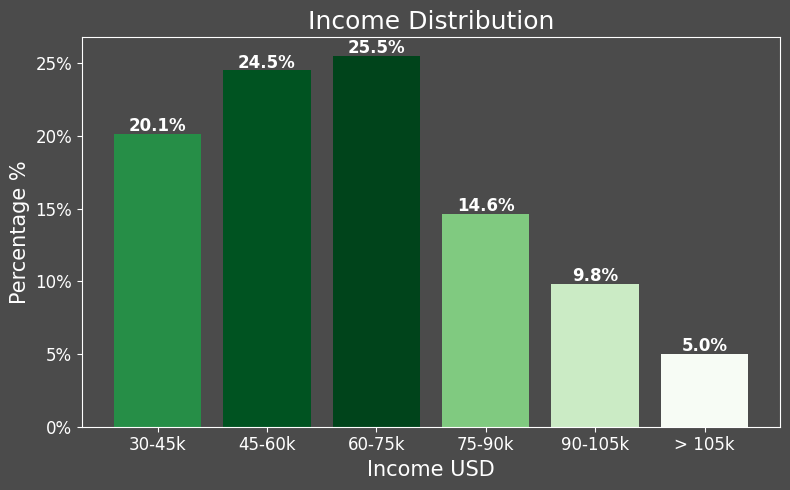

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Assuming customers DataFrame and income_group column are already defined

# Create a new column `income_group`
income_group = pd.cut(customers['income'],
                      bins=[customers['income'].min(), 45000, 60000, 75000, 90000, 105000, customers['income'].max()],
                      labels=['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k'])
customers['income_group'] = income_group

# Visualize customers by income groups
income_group_percentage = (customers.value_counts('income_group').sort_index() / customers.shape[0] * 100).round(1)

# Set the background color
background_color = '#4b4b4b'

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

yticks = np.arange(0, 30, 5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels=yticklabels, fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Income USD', fontsize=15)
plt.ylabel('Percentage %', fontsize=15)
plt.title('Income Distribution', fontsize=18)

# Set the color of the bars using a diverging color map (light green to dark green)
norm = Normalize(vmin=income_group_percentage.min(), vmax=income_group_percentage.max())
colors = plt.cm.Greens(norm(income_group_percentage))

bar_plot = plt.bar(x=income_group_percentage.index.values, height=income_group_percentage, color=colors)

for i, bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x + bar.get_width() / 2, y + bar.get_height() + 0.2,
             str(income_group_percentage[i]) + '%',
             ha='center', weight='bold', fontsize=12)

plt.tight_layout()
plt.show()


### Univariate Analysis - `became_member_on`


In [114]:
 #Create a new df focusing on the time customers became members
df_member = customers[['id', 'became_member_on']]

# Add columns `year`, `month`, `day_of_week`
df_member = df_member.assign(year = df_member.became_member_on.dt.year,
                             month = df_member.became_member_on.dt.month,
                             day = df_member.became_member_on.dt.day,
                             month_name = df_member.became_member_on.dt.month_name(),
                             day_of_week = df_member.became_member_on.dt.weekday,
                             day_name = df_member.became_member_on.dt.day_name())
df_member.head(3)

,id,became_member_on,year,month,day,month_name,day_of_week,day_name
0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,2017,7,15,July,5,Saturday
1,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,2017,5,9,May,1,Tuesday
2,e2127556f4f64592b11af22de27a7932,2018-04-26,2018,4,26,April,3,Thursday


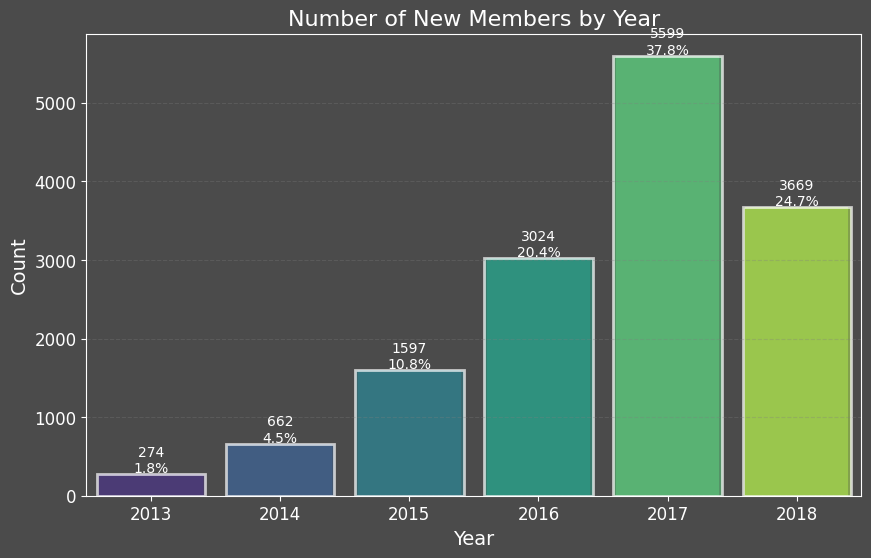

In [130]:


# Assuming df_member DataFrame is already defined

# Set the background color
background_color = '#4b4b4b'

# Create the plot with Seaborn
plt.figure(figsize=(10, 6), facecolor=background_color)
ax = plt.gca()

# Using countplot to get the positions of the bars
countplot = sns.countplot(data=df_member, x='year', palette='viridis', ax=ax)

# Set the background color for the plot area
ax.set_facecolor(background_color)

# Add data labels with a more readable way
for p in countplot.patches:
    height = p.get_height()
    ax.annotate(f'{height}\n{height/len(df_member)*100:.1f}%', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                fontsize=10, color='white')

# Set the title and axis labels
plt.title('Number of New Members by Year', fontsize=16, color='white')
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.xlabel('Year', fontsize=14, color='white')
plt.ylabel('Count', fontsize=14, color='white')

# Add horizontal grid lines
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

# Adjust bar width for a better appearance
bar_width = 0.8
for i, p in enumerate(countplot.patches):
    current_width = p.get_width()
    diff = current_width - bar_width

    # Change the bar width
    p.set_width(bar_width)

    # Recenter the bar
    p.set_x(p.get_x() + diff * .5)

    # Add borders and shadows
    rect = Rectangle((p.get_x() - 0.02, p.get_y() - 0.02), p.get_width() + 0.04, p.get_height() + 0.04,
                     linewidth=2, edgecolor='white', facecolor=p.get_facecolor(), alpha=0.7)
    ax.add_patch(rect)

# Show the plot
plt.show()


#### Daily member growth

In [131]:
# Create a time series with the number of new member on each day
p = df_member.value_counts('became_member_on').sort_index()
df_member_growth = pd.DataFrame(index = p.index.values, data = p.values, columns = ['Number of New Members'])

# There are four phases with clearly different daily growth
phase_1 = df_member_growth.loc['2013-july': '2015-july']
len_phase_1 = phase_1.shape[0]
mean_phase_1 = phase_1.mean().values

phase_2 = df_member_growth.loc['2015-august': '2017-july']
len_phase_2 = phase_2.shape[0]
mean_phase_2 = phase_2.mean().values

phase_3 = df_member_growth.loc['2017-august': '2018-jan']
len_phase_3 = phase_3.shape[0]
mean_phase_3 = phase_3.mean().values

phase_4 = df_member_growth.loc['2018-feb': '2018-july']
len_phase_4 = phase_4.shape[0]
mean_phase_4 = phase_4.mean().values

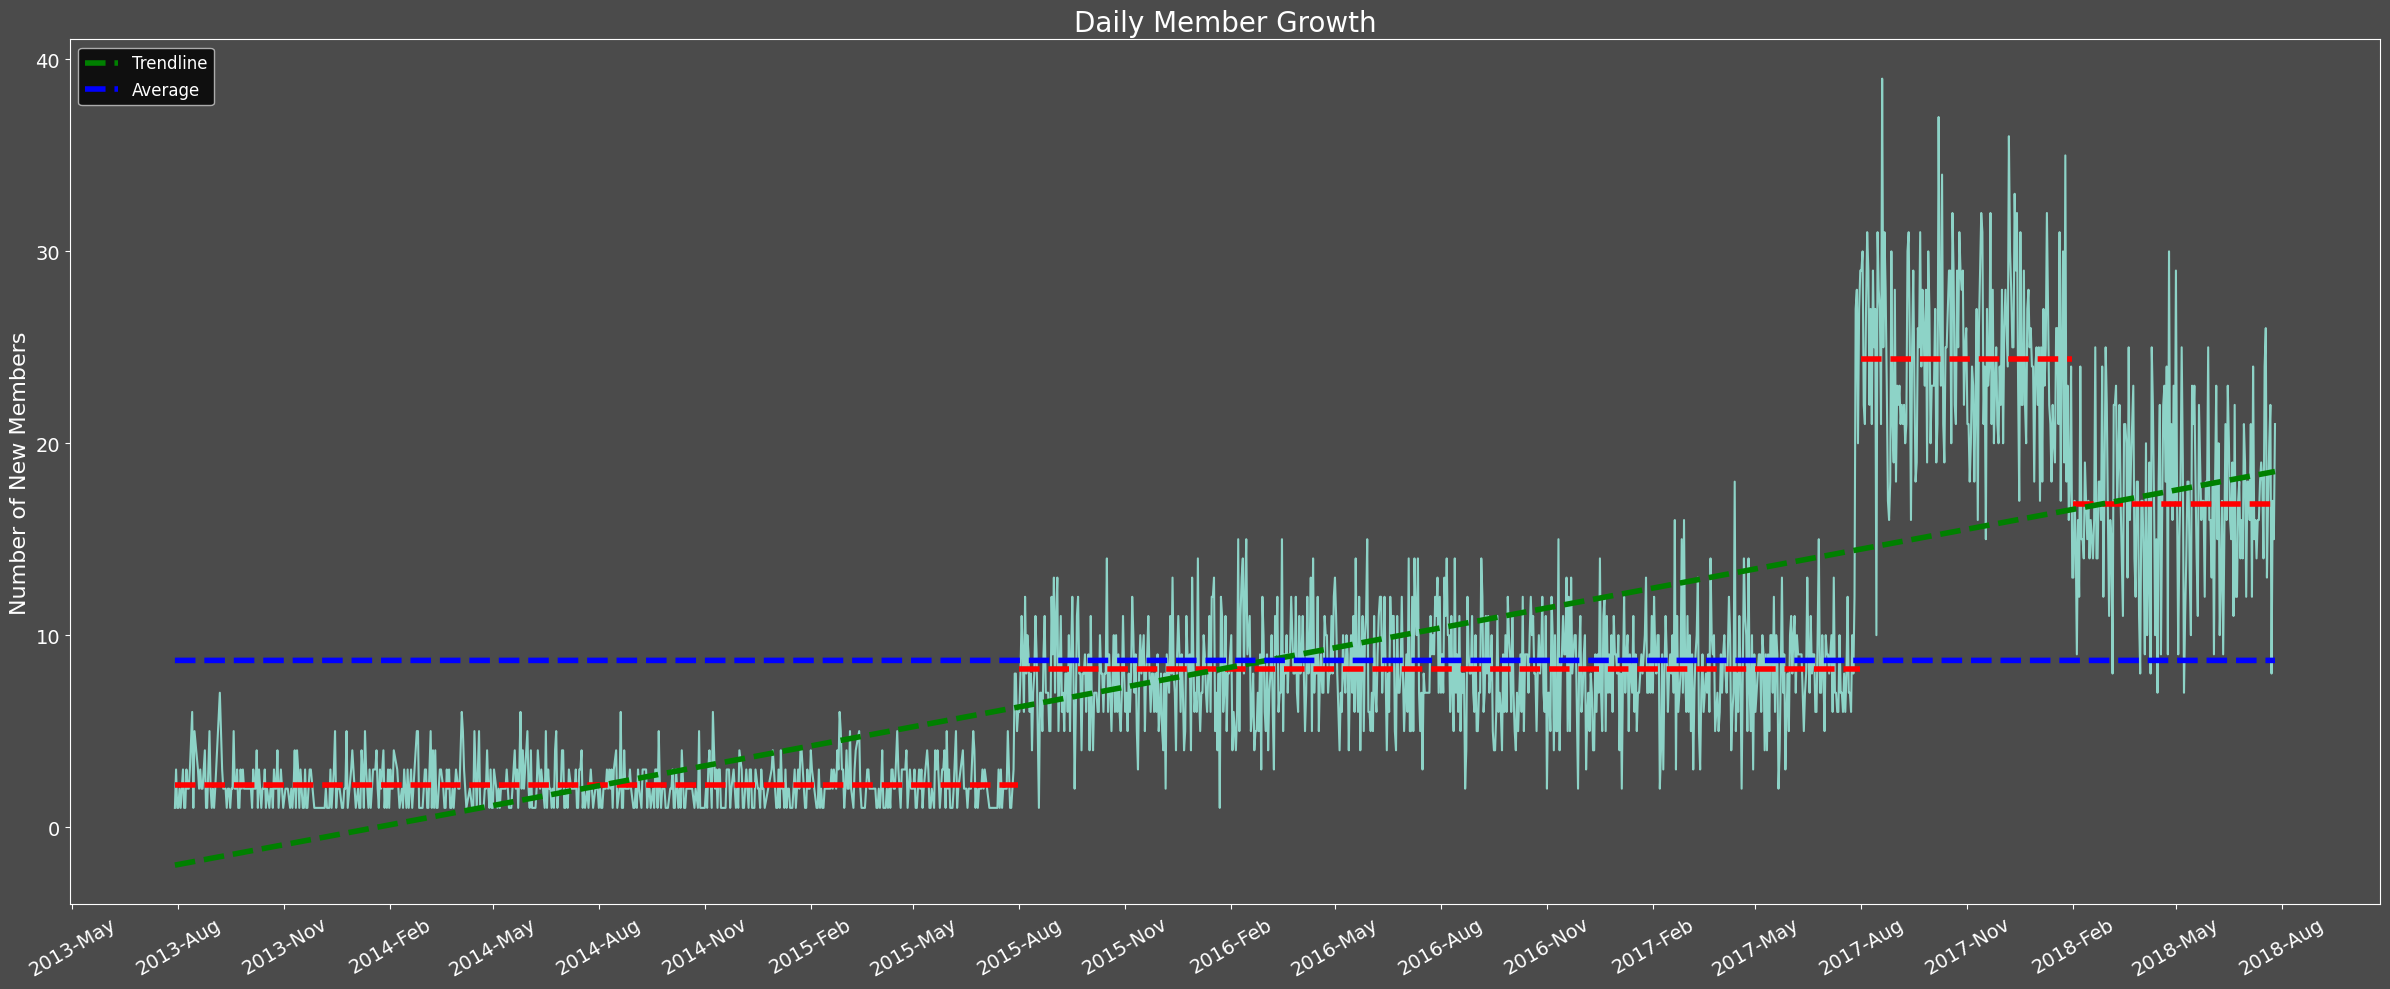

In [144]:
from sklearn.linear_model import LinearRegression

# Assuming df_member_growth, phase_1, phase_2, phase_3, phase_4, mean_phase_1, mean_phase_2, mean_phase_3, mean_phase_4 are defined

# Set the background color
background_color = '#4b4b4b'

# Visualize with a wider plot
plt.figure(figsize=(24, 10), facecolor=background_color)
ax = sns.lineplot(x=df_member_growth.index.values, y=df_member_growth['Number of New Members'])
date_format = mdates.DateFormatter('%Y-%b')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.plot(phase_1.index.values, np.ones(len(phase_1)) * mean_phase_1, '--r', lw=4)
plt.plot(phase_2.index.values, np.ones(len(phase_2)) * mean_phase_2, '--r', lw=4)
plt.plot(phase_3.index.values, np.ones(len(phase_3)) * mean_phase_3, '--r', lw=4)
plt.plot(phase_4.index.values, np.ones(len(phase_4)) * mean_phase_4, '--r', lw=4)

# Add trendline with thicker and dashed line
x_values = mdates.date2num(df_member_growth.index.values)
y_values = df_member_growth['Number of New Members'].values
regressor = LinearRegression()
regressor.fit(x_values.reshape(-1, 1), y_values)
trendline = regressor.predict(x_values.reshape(-1, 1))
plt.plot(df_member_growth.index, trendline, '--g', lw=4, label='Trendline')

# Add average line with thicker and dashed line
avg_line = np.ones_like(y_values) * np.mean(y_values)
plt.plot(df_member_growth.index, avg_line, '--b', lw=4, label='Average')

plt.xticks(text=ax.xaxis.get_label(), fontsize=14, rotation=30, color='white')
plt.yticks(text=ax.yaxis.get_label(), fontsize=14, color='white')
plt.ylabel('Number of New Members', fontsize=16, color='white')
plt.title('Daily Member Growth', fontsize=20, color='white')

# Set the background color for the plot area
ax.set_facecolor(background_color)

# Add legend
plt.legend(fontsize=12, loc='upper left')

plt.tight_layout()
plt.show()


### Bivariate Analysis -  `age` vs `gender`

              age
gender           
F       57.544950
M       52.116690
O       54.400943


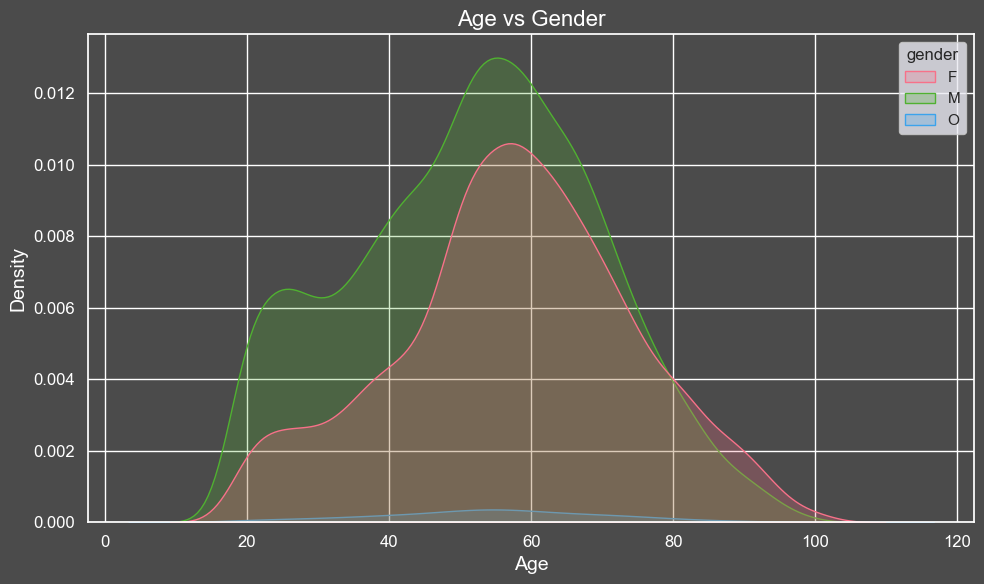

In [150]:
# Set the background color
background_color = '#4b4b4b'

# Print mean age by gender
print(customers.groupby('gender').agg({'age': 'mean'}))

# Get unique values in the 'gender' column
unique_genders = customers['gender'].unique()

# Create a dynamic palette based on unique genders
palette = {gender: sns.color_palette("husl", n_colors=len(unique_genders))[i] for i, gender in enumerate(unique_genders)}

# Visualize KDE plot with updated background and color codes
plt.figure(figsize=(10, 6), facecolor=background_color)
sns.set(style="darkgrid")

sns.kdeplot(data=customers, x='age', hue='gender', fill=True, palette=palette)
plt.title('Age vs Gender', fontsize=16, color='white')

# Set the background color for the plot area
plt.gca().set_facecolor(background_color)

# Set text color for labels and ticks
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.xlabel('Age', fontsize=14, color='white')
plt.ylabel('Density', fontsize=14, color='white')

plt.tight_layout()
plt.show()

### Bivariate Analysis -  `income` vs `gender`

              income
gender              
F       71306.412139
M       61194.601603
O       63287.735849


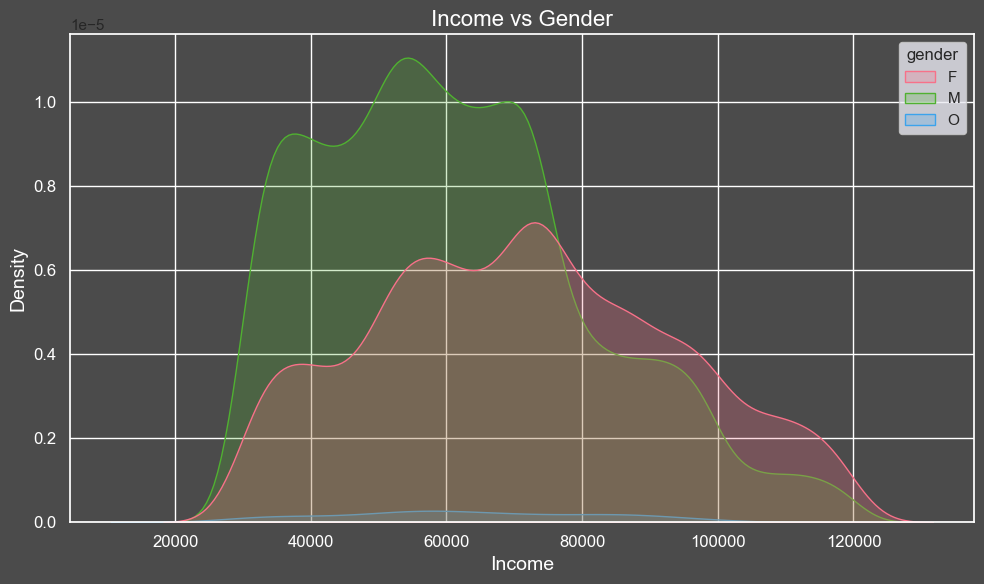

In [151]:
# Set the background color
background_color = '#4b4b4b'

# Print mean income by gender
print(customers.groupby('gender').agg({'income': 'mean'}))

# Get unique values in the 'gender' column
unique_genders = customers['gender'].unique()

# Create a dynamic palette based on unique genders
palette = {gender: sns.color_palette("husl", n_colors=len(unique_genders))[i] for i, gender in enumerate(unique_genders)}

# Visualize KDE plot with updated background and color codes
plt.figure(figsize=(10, 6), facecolor=background_color)
sns.set(style="darkgrid")

sns.kdeplot(data=customers, x='income', hue='gender', fill=True, palette=palette)
plt.title('Income vs Gender', fontsize=16, color='white')

# Set the background color for the plot area
plt.gca().set_facecolor(background_color)

# Set text color for labels and ticks
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.xlabel('Income', fontsize=14, color='white')
plt.ylabel('Density', fontsize=14, color='white')

plt.tight_layout()
plt.show()

## 3 K-Means Clustering

In [169]:
# Create an empty df with columns needed
customer_behavior = pd.DataFrame(columns = ['person', 'num_received', 'num_viewed', 'num_completed', 'num_transactions', 'money_spent'])
# Remove rows of customers with missing gender and income
id_to_remove = missing_income['id']
transcripts_filtered = transcripts[~transcripts['person'].isin(id_to_remove)].reset_index(drop = True)

# Add data to `person`, ordered in ascending order
customer_behavior['person'] = transcripts_filtered.value_counts('person').sort_index().index.values

# Aggregate df transcripts
transcripts_filtered = transcripts_filtered.sort_values('person')
transcripts_grouped = transcripts_filtered.groupby(['person', 'event']).count()
transcripts_grouped.head()

dict_key  dict_value  \
person                           event                                   
0009655768c64bdeb2e877511632db8f offer completed         3           3   
                                 offer received          5           5   
                                 offer viewed            4           4   
                                 transaction             8           8   
0011e0d4e6b944f998e987f904e8c1e5 offer completed         3           3   

                                                  hours_since_start  
person                           event                               
0009655768c64bdeb2e877511632db8f offer completed                  3  
                                 offer received                   5  
                                 offer viewed                     4  
                                 transaction                      8  
0011e0d4e6b944f998e987f904e8c1e5 offer completed                  3

In [170]:
# Set `person` as index for easy slicing
customer_behavior.set_index('person', inplace = True)

# Add data to `num_received`, `num_viewed`, `num_completed` and `num_transactions`
for person_id in customer_behavior.index.values:
    if (person_id, 'offer received') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_received'] = transcripts_grouped.loc[(person_id, 'offer received'), 'dict_key']
    if (person_id, 'offer viewed') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_viewed'] = transcripts_grouped.loc[(person_id, 'offer viewed'), 'dict_key']
    if (person_id, 'offer completed') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_completed'] = transcripts_grouped.loc[(person_id, 'offer completed'), 'dict_key']
    if (person_id, 'transaction') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_transactions'] = transcripts_grouped.loc[(person_id, 'transaction'), 'dict_key']
    

In [171]:
# Calculate how much money each customer spent during the month of the campaign
money_spent = transcripts_filtered[transcripts_filtered['event'] == 'transaction'].groupby('person').agg({'dict_value': 'sum'})

# Add to `money_spent`
customer_behavior['money_spent'] = money_spent
customer_behavior.head(3)

,num_received,num_viewed,num_completed,num_transactions,money_spent
person,,,,,
0009655768c64bdeb2e877511632db8f,5,4,3,8,127.6
0011e0d4e6b944f998e987f904e8c1e5,5,5,3,5,79.46
0020c2b971eb4e9188eac86d93036a77,5,3,3,8,196.86


In [172]:
customer_behavior.isna().sum()

num_received           5
num_viewed           150
num_completed       2839
num_transactions     333
money_spent          333
dtype: int64

In [173]:
# Replace NA with 0
customer_behavior.fillna(0, inplace = True)
customer_behavior.isna().sum()

num_received        0
num_viewed          0
num_completed       0
num_transactions    0
money_spent         0
dtype: int64

In [174]:
# Keep a copy of the df with `num_received`
customer_behavior_with_num_received = customer_behavior.copy()

# Drop `num_received`
customer_behavior.drop('num_received', axis = 1, inplace = True)
customer_behavior.head(3)

,num_viewed,num_completed,num_transactions,money_spent
person,,,,
0009655768c64bdeb2e877511632db8f,4,3,8,127.60
0011e0d4e6b944f998e987f904e8c1e5,5,3,5,79.46
0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86


In [175]:
customer_behavior['money_spent'].describe()

count    14825.000000
mean       117.028155
std        129.965016
min          0.000000
25%         31.450000
50%         87.040000
75%        160.900000
max       1608.690000
Name: money_spent, dtype: float64

In [176]:
# Remove rows with top 2% in `money_spent`
q = customer_behavior['money_spent'].quantile(0.98)
rows_top_money_spent = customer_behavior[customer_behavior['money_spent'] >= q]

person_top_money_spent = rows_top_money_spent.index.values
customer_top_money_spent_removed = customer_behavior[customer_behavior['money_spent'] < q]

print('Number of rows removed:', rows_top_money_spent.shape[0])

Number of rows removed: 297


In [180]:
#The features are of different order of magnitudes, therefore need to be standardized.
scaler_customer_behavior = StandardScaler()
scaler_customer_behavior.fit(customer_behavior_filtered)
customer_behavior_scaled = scaler_customer_behavior.transform(customer_behavior_filtered)
pd.DataFrame(data = customer_behavior_scaled, columns = customer_behavior_filtered.columns.values).head(3)

,num_viewed,num_completed,num_transactions,money_spent
0,0.501233,0.531352,-0.060069,0.277234
1,1.276977,0.531352,-0.639666,-0.281415
2,-0.274511,0.531352,-0.060069,1.080974


### Optimal number of clusters _k_

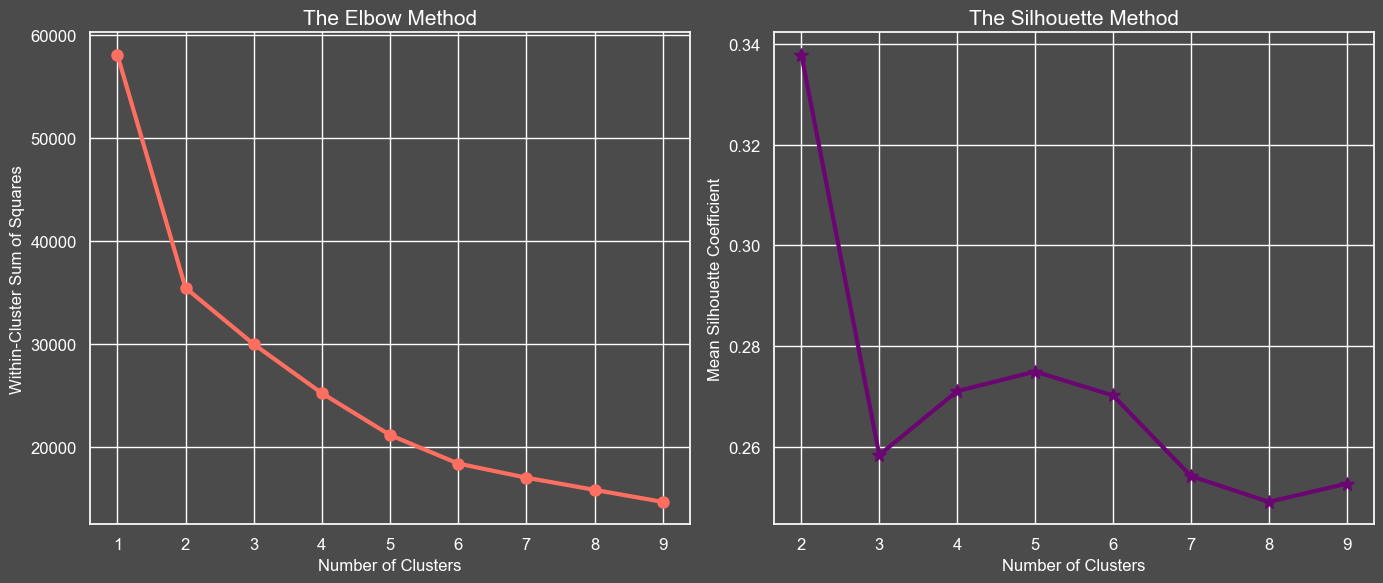

In [182]:
# Set the background color
background_color = '#4b4b4b'

df_feature = customer_behavior_scaled
wcss = []
sil_score = []
max_clusters = 10

for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(df_feature)
    # calculate wcss for the Elbow Method
    wcss.append(kmeans.inertia_)

    # calculate the mean Silhouette coefficient
    if k >= 2:
        labels = kmeans.labels_
        sil_score.append(metrics.silhouette_score(df_feature, labels))

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6), facecolor=background_color)
sns.set(style="darkgrid")

# Elbow Method
axs[0].plot(np.arange(1, max_clusters), wcss, marker='o', markersize=8, linestyle='-', color='#FF6F61', lw=3)
axs[0].set_xlabel('Number of Clusters', fontsize=12, color='white')
axs[0].set_ylabel('Within-Cluster Sum of Squares', color='white')
axs[0].set_title('The Elbow Method', fontsize=15, color='white')

# Silhouette Method
axs[1].plot(np.arange(2, max_clusters), sil_score, marker='*', markersize=10, linestyle='-', color='#6A0572', lw=3)
axs[1].set_xlabel('Number of Clusters', fontsize=12, color='white')
axs[1].set_ylabel('Mean Silhouette Coefficient', color='white')
axs[1].set_title('The Silhouette Method', fontsize=15, color='white')

# Set the background color for the plot area
for ax in axs:
    ax.set_facecolor(background_color)
    ax.tick_params(axis='x', labelsize=12, colors='white')
    ax.tick_params(axis='y', labelsize=12, colors='white')

plt.tight_layout()
plt.show()


- From the Elbow graph, it can be observed (not easily) that from _k_ = 5, the within cluster sum of squares (WCSS) stops decreasing at an increasing rate.
- From the Silhouette graph, the maximum is found at _k_ = 5 (_k_ = 2 excluded).
- 5 segments may seem quiet a lot, but if the clusters show clear difference in features, the result should still be intepretable.  

Therefore, 5 clusters will be used for the K-Means clustering analysis.

### K-Means Clustering

cluster
0    4018
1    2901
2    2649
3    1584
4    3376
dtype: int64

 ************************************************************
Silhouette Score: 0.2749914632100169

 ************************************************************
        num_viewed num_completed num_transactions money_spent
              mean          mean             mean        mean
cluster                                                      
0              2.1           0.7              5.0        34.6
1              4.5           4.1             12.2       223.0
2              4.5           1.5              4.5        50.3
3              3.5           2.0             17.1        72.2
4              2.8           2.9              7.7       140.2


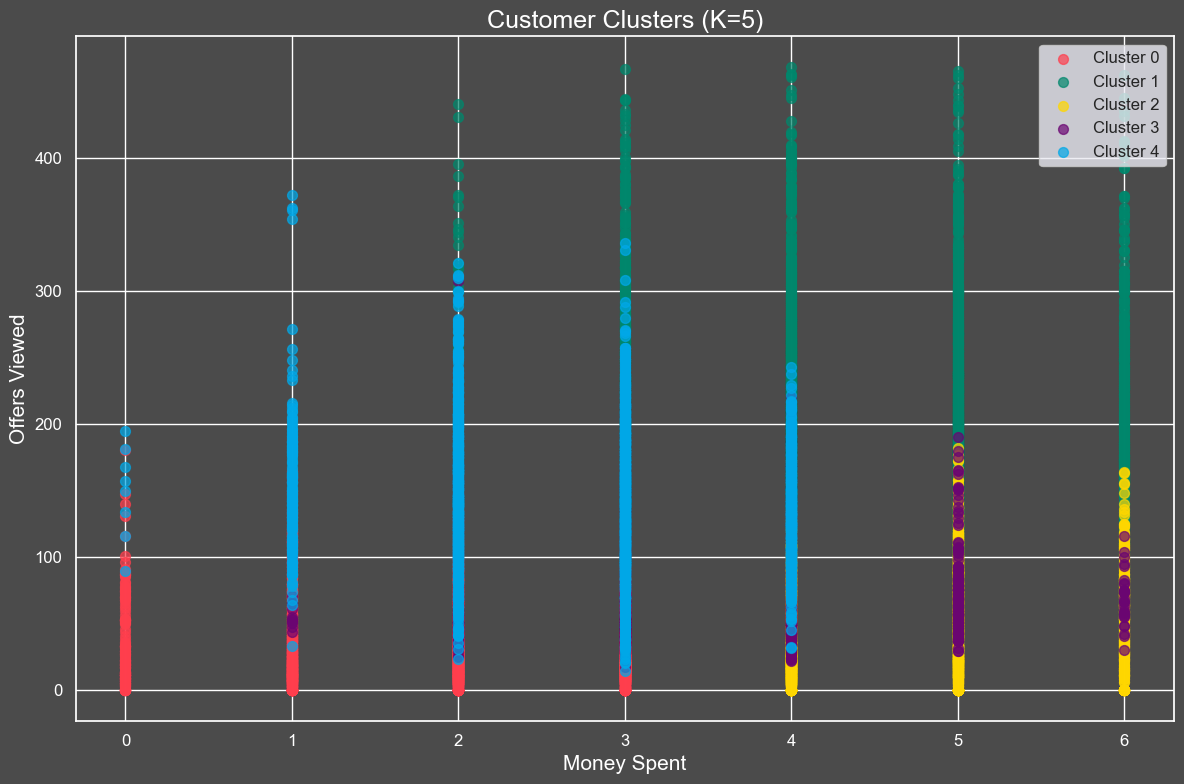

In [185]:
# Set the background color
background_color = '#4b4b4b'

k = 5
df_feature = customer_behavior_scaled
kmeans = KMeans(n_clusters=k, random_state=10)
kmeans.fit_transform(df_feature)
customer_with_cluster = customer_behavior_filtered.assign(cluster=kmeans.labels_)

# Print cluster counts
print(customer_with_cluster.value_counts('cluster').sort_index())

# Calculate and print Silhouette Score
line_sep = '*' * 60
print('\n', line_sep)
silhouette_score = metrics.silhouette_score(df_feature, labels=kmeans.labels_)
print('Silhouette Score:', silhouette_score)

# Print cluster information
cluster_info = customer_with_cluster.groupby('cluster').agg([np.mean]).round(1)
print('\n', line_sep)
print(cluster_info)

# Plot
plt.figure(figsize=(12, 8), facecolor=background_color)
sns.set(style="darkgrid")

# Updated cluster colors
color_list = ['#FF3E4D', '#00876C', '#FFD700', '#6A0572', '#00A8E8']
legend_list = [f'Cluster {i}' for i in range(k)]

for i in range(k):
    plt.scatter(customer_with_cluster.loc[customer_with_cluster['cluster'] == i, 'num_viewed'],
                customer_with_cluster.loc[customer_with_cluster['cluster'] == i, 'money_spent'],
                c=color_list[i], label=legend_list[i], alpha=0.7, s=50)

plt.ylabel('Offers Viewed', fontsize=15, color='white')
plt.xlabel('Money Spent', fontsize=15, color='white')
plt.legend(fontsize=12, loc='upper right')
plt.title(f'Customer Clusters (K={k})', fontsize=18, color='white')

# Set the background color for the plot area
plt.gca().set_facecolor(background_color)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.tight_layout()
plt.show()

In [187]:
#Assessing the clustering results
# Split data for train and test
X = customer_behavior_scaled
Y = customer_with_cluster['cluster']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

# Multiclass logistic regression
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Check test accurracy
y_predict = clf.predict(x_test)
print("Test accuracy:", metrics.accuracy_score(y_test, y_predict))

Test accuracy: 0.993805918788713


In [188]:
# K-Nearest Neighbors Classificaiton
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)

# Check test accuracy
y_predict = knn.predict(x_test)
print("Test accuracy:", metrics.accuracy_score(y_test, y_predict))

Test accuracy: 0.9855471438403304


/Users/artashesmatshkalyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



## Visualize clusters separately

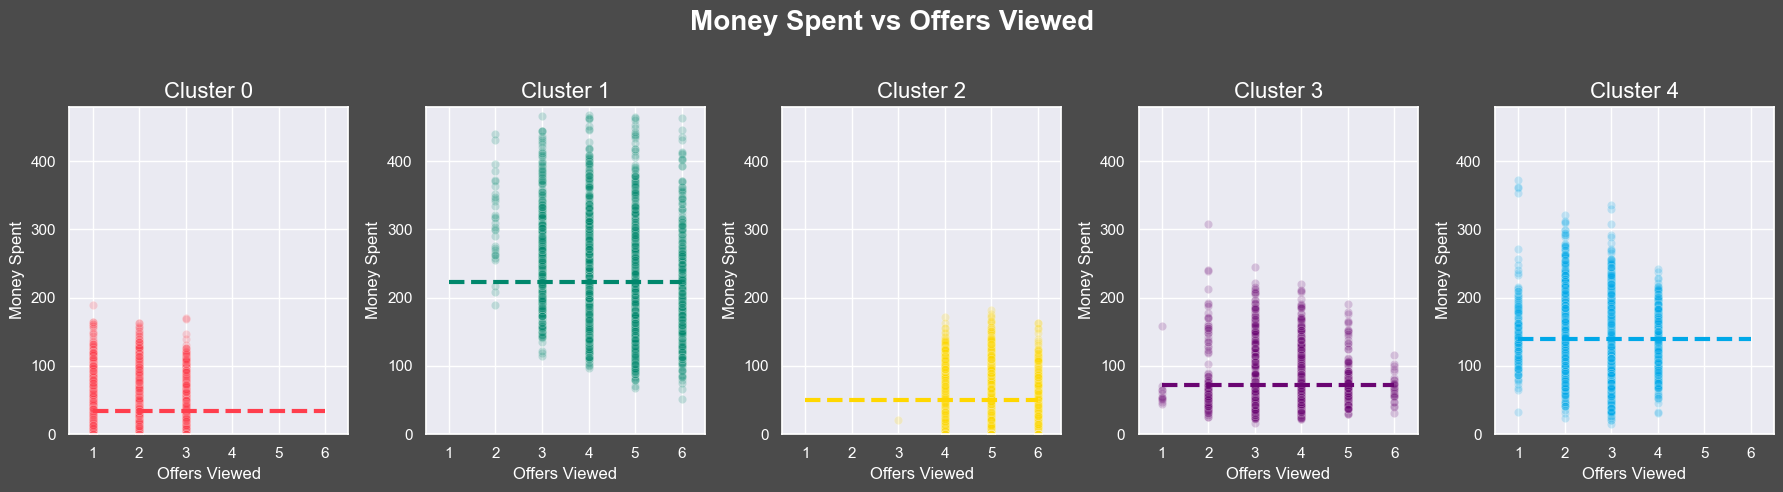

In [195]:
# Set the background color
background_color = '#4b4b4b'

k = 5
color_list = ['#FF3E4D', '#00876C', '#FFD700', '#6A0572', '#00A8E8']

fig, axs = plt.subplots(1, k, figsize=(18, 5), facecolor=background_color)
sns.set(style="darkgrid")

for i in range(k):
    cluster_data = customer_with_cluster[customer_with_cluster['cluster'] == i]
    
    sns.scatterplot(data=cluster_data, x='num_viewed', y='money_spent', alpha=0.2, color=color_list[i], ax=axs[i])
    
    mean_value = cluster_data['money_spent'].mean()
    axs[i].plot(np.arange(1, 7), np.ones(6) * mean_value, color=color_list[i], lw=3, linestyle='dashed')
    axs[i].set_title(f'Cluster {i}', fontsize=16, color='white')
    axs[i].set_xlim((0.5, 6.5))
    axs[i].set_ylim((0, 480))
    axs[i].tick_params(axis='x', colors='white')  # Set x-axis ticks color to white
    axs[i].tick_params(axis='y', colors='white')  # Set y-axis ticks color to white
    axs[i].set_xlabel('Offers Viewed', fontsize=12, color='white')  # Set x-axis label color to white
    axs[i].set_ylabel('Money Spent', fontsize=12, color='white')

fig.suptitle('Money Spent vs Offers Viewed', fontsize=20, fontweight='bold', color='white')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the suptitle position
plt.show()

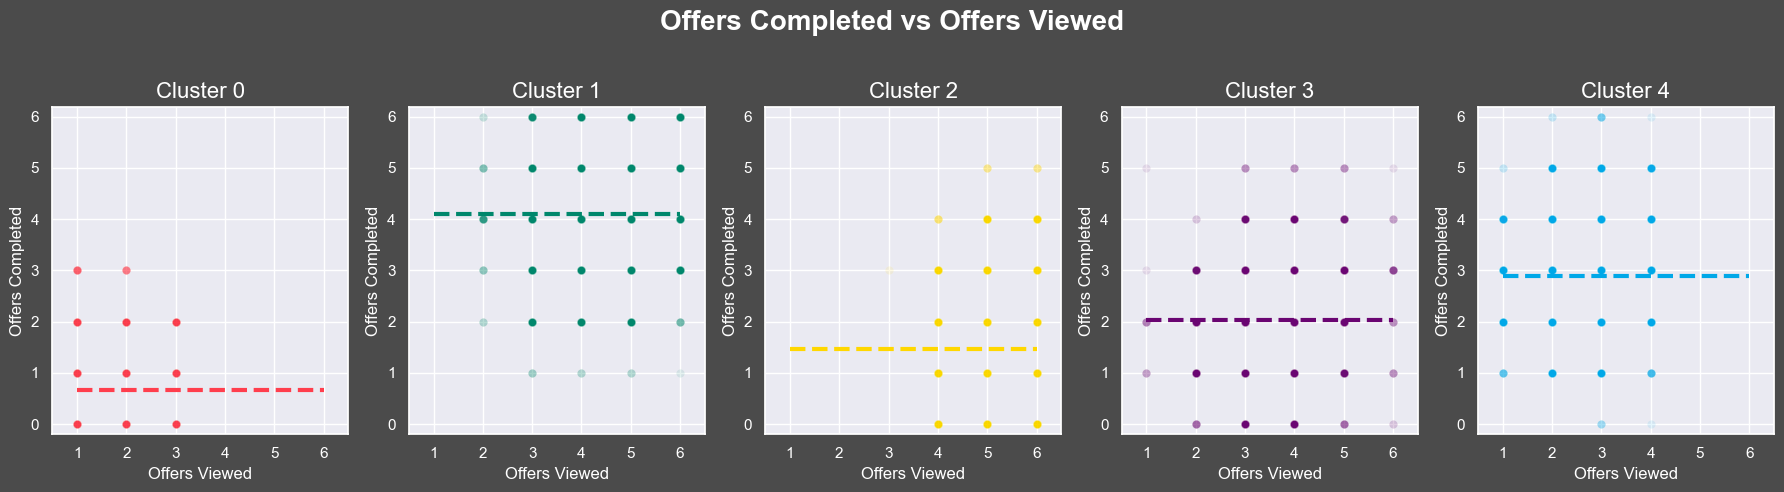

In [197]:
# Set the background color
background_color = '#4b4b4b'

k = 5
color_list = ['#FF3E4D', '#00876C', '#FFD700', '#6A0572', '#00A8E8']

fig, axs = plt.subplots(1, k, figsize=(18, 5), facecolor=background_color)
sns.set(style="darkgrid")

for i in range(k):
    cluster_data = customer_with_cluster[customer_with_cluster['cluster'] == i]
    
    sns.scatterplot(data=cluster_data, x='num_viewed', y='num_completed', alpha=0.1, color=color_list[i], ax=axs[i])
    
    mean_value = cluster_data['num_completed'].mean()
    axs[i].plot(np.arange(1, 7), np.ones(6) * mean_value, color=color_list[i], lw=3, linestyle='dashed')
    axs[i].set_title(f'Cluster {i}', fontsize=16, color='white')
    axs[i].set_xlim((0.5, 6.5))
    axs[i].set_ylim((-0.2, 6.2))
    axs[i].tick_params(axis='x', colors='white')  # Set x-axis ticks color to white
    axs[i].tick_params(axis='y', colors='white')  # Set y-axis ticks color to white
    axs[i].set_xlabel('Offers Viewed', fontsize=12, color='white')  # Set x-axis label color to white
    axs[i].set_ylabel('Offers Completed', fontsize=12, color='white')

fig.suptitle('Offers Completed vs Offers Viewed', fontsize=20, fontweight='bold', color='white')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the suptitle position
plt.show()

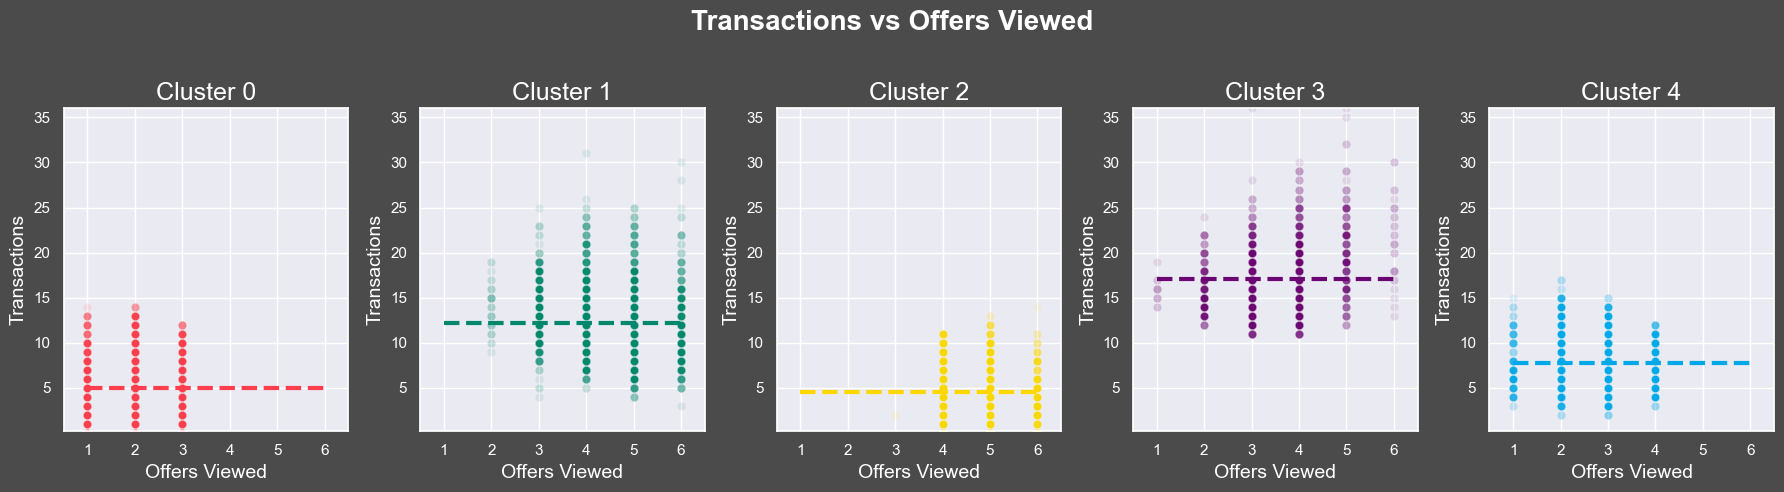

In [198]:
# Set the background color
background_color = '#4b4b4b'

k = 5
color_list = ['#FF3E4D', '#00876C', '#FFD700', '#6A0572', '#00A8E8']

fig, axs = plt.subplots(1, k, figsize=(18, 5), facecolor=background_color)
sns.set(style="darkgrid")

for i in range(k):
    cluster_data = customer_with_cluster[customer_with_cluster['cluster'] == i]
    
    sns.scatterplot(data=cluster_data, x='num_viewed', y='num_transactions', alpha=0.1, color=color_list[i], ax=axs[i])
    
    mean_value = cluster_data['num_transactions'].mean()
    axs[i].plot(np.arange(1, 7), np.ones(6) * mean_value, color=color_list[i], lw=3, linestyle='dashed')
    axs[i].set_title(f'Cluster {i}', fontsize=18, color='white')
    axs[i].set_xlim((0.5, 6.5))
    axs[i].set_ylim((0.2, 36))
    axs[i].tick_params(axis='x', colors='white')  # Set x-axis ticks color to white
    axs[i].tick_params(axis='y', colors='white')  # Set y-axis ticks color to white
    axs[i].set_xlabel('Offers Viewed', fontsize=14, color='white')  # Set x-axis label color to white
    axs[i].set_ylabel('Transactions', fontsize=14, color='white')

fig.suptitle('Transactions vs Offers Viewed', fontsize=20, fontweight='bold', color='white')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the suptitle position
plt.show()

Cluster Analysis Summary:

Valuable Customers - Cluster 1:
Customers in this cluster consistently respond positively to offers, displaying a high rate of offer views and completions. Although they don't make the most purchases (around 12 per month), their spending surpasses all other clusters, with an impressive Average Purchase Value of $18.2. Notably, high-spending outliers also align with this cluster. Recommendation: The company should prioritize retaining and encouraging more purchases from these high-value customers.

Regular Patrons - Cluster 3:
Customers in this cluster make frequent purchases, averaging more than one every two days, establishing them as regular patrons. Despite viewing and completing offers around the overall average, their total spending is slightly below average due to a lower Average Purchase Value of $4.2. Suggestion: As loyal customers who purchase with or without offers, efforts should focus on increasing their Average Purchase Value, possibly through enticing them with discounted or free trials of higher-priced products.

Potential High-Value Customers - Cluster 4:
With the second-highest Average Purchase Value at $18.1, these customers exhibit a strong response to offers, viewing most and completing 70%. Customization: Leveraging their sensitivity to offers, the company should target them with more offers to boost their purchase frequency, potentially elevating them to Most Valuable Customers.

Offer Explorers - Cluster 2:
This cluster displays a keen interest in offer viewing (4.5) but completes fewer offers (1.5) with a moderate Average Purchase Value of $11.1. Customization: To engage these customers more effectively, the company should tailor offers with attractive deals across a variety of products to encourage habitual purchasing.

Low-Engagement Segment - Cluster 0:
Despite receiving a similar number of offers, customers in this cluster exhibit low engagement across all features, resulting in a low Average Purchase Value of $6.9. Customization: Addressing the low engagement of these customers will require strategic efforts, considering factors such as brand loyalty or the lack of a purchasing habit. The company should invest resources if a change in engagement is desired.